# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0..4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5..9].

## 1. Import necessary libraries for the model

In [0]:

import tensorflow as tf
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from google.colab import drive

Using TensorFlow backend.


In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
tf.reset_default_graph()
tf.set_random_seed(100)

In [0]:

tf.__version__

'1.13.1'

## 2. Import MNIST data and create 2 datasets with one dataset having digits from 0 to 4 and other from 5 to 9 

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [0]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
('x_train shape:', (60000, 28, 28))
('x_test shape:', (10000, 28, 28))
(60000, 'train samples')
(10000, 'test samples')


In [0]:
x_train1 = x_train[y_train < 5]
y_train1 = y_train[y_train < 5]



In [0]:
x_test1 = x_test[y_test < 5]
y_test1 = y_test[y_test < 5]

In [0]:
x_train2 = x_train[y_train >= 5]
y_train2 = y_train[y_train >= 5]

In [0]:
x_test2 = x_test[y_test >= 5]
y_test2 = y_test[y_test >= 5]

## 3. Print x_train, y_train, x_test and y_test for both the datasets

In [0]:
print('--- THE DATA ---')
print('x_train1 shape:', x_train1.shape)
print('x_test1 shape:', x_test1.shape)
print(x_train1.shape[0], 'train1 samples')
print(x_test1.shape[0], 'test1 samples')
print(y_train1.shape[0], 'ytrain1 samples')
print(y_test1.shape[0], 'ytest1 samples')

--- THE DATA ---
('x_train1 shape:', (30596, 28, 28))
('x_test1 shape:', (5139, 28, 28))
(30596, 'train1 samples')
(5139, 'test1 samples')
(30596, 'ytrain1 samples')
(5139, 'ytest1 samples')


#####Find dimensions of an image in the dataset

In [0]:
x_train1[0].shape

(28, 28)

In [0]:
y_train1[0].shape

()

In [0]:
print('--- THE DATA ---')
print('x_train2 shape:', x_train2.shape)
print('x_test2 shape:', x_test2.shape)
print(x_train2.shape[0], 'train2 samples')
print(x_test2.shape[0], 'test2 samples')

print(y_train2.shape[0], 'ytrain2 samples')
print(y_test2.shape[0], 'ytest2 samples')

--- THE DATA ---
('x_train2 shape:', (29404, 28, 28))
('x_test2 shape:', (4861, 28, 28))
(29404, 'train2 samples')
(4861, 'test2 samples')
(29404, 'ytrain2 samples')
(4861, 'ytest2 samples')


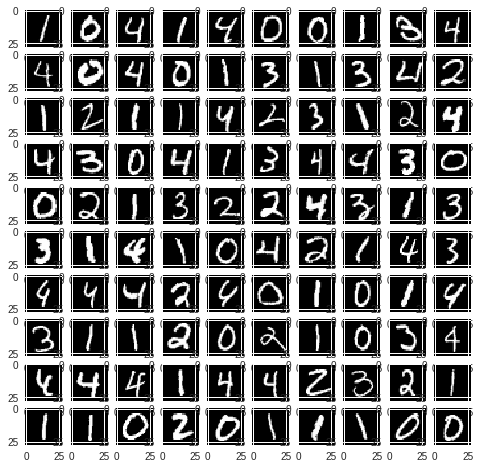

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test1[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

## ** 4. Let us take only the dataset (x_train, y_train, x_test, y_test) for Integers 0 to 4 in MNIST **
## Reshape x_train and x_test to a 4 Dimensional array (channel = 1) to pass it into a Conv2D layer

In [0]:

x_train1 = x_train1.reshape(x_train1.shape[0], 28, 28, 1)   ## grey scale image and hence adding 1
x_test1 = x_test1.reshape(x_test1.shape[0], 28, 28, 1)

In [0]:
x_train1[0].shape

(28, 28, 1)

## 5. Normalize x_train and x_test by dividing it by 255

In [0]:
x_train1 = x_train1.astype('float32')
x_test1 = x_test1.astype('float32')

In [0]:
x_train2 = x_train2.astype('float32')
x_test2 = x_test2.astype('float32')

In [0]:
x_train1 /= 255
x_test1 /= 255


## 6. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
np.unique(y_train1)


array([0, 1, 2, 3, 4], dtype=uint8)

In [0]:
np.unique(y_train2)

array([5, 6, 7, 8, 9], dtype=uint8)

In [0]:
y_train1 = tf.keras.utils.to_categorical(y_train1, num_classes=5)
y_test1 = tf.keras.utils.to_categorical(y_test1, num_classes=5)


In [0]:
y_train1

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

## 7. Build a sequential model with 2 Convolutional layers with 32 kernels of size (3,3) followed by a Max pooling layer of size (2,2) followed by a drop out layer to be trained for classification of digits 0-4  

In [0]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1),name='conv_1'))

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25,name='drop_1'))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## 8. Post that flatten the data and add 2 Dense layers with 128 neurons and neurons = output classes with activation = 'relu' and 'softmax' respectively. Add dropout layer inbetween if necessary  

In [0]:
#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))
model.add(Dense(128, activation='relu',name='dense_2'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.25,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(5, activation='softmax',name='dense_3'))

## 9. Print the training and test accuracy

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.01)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        9248      
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
__________

In [0]:
y_test1.shape

(5139, 5)

In [0]:
#Training on the dataset
history = model.fit(x_train1, y_train1,
          batch_size=100,
          epochs=20,
          verbose=1,
          validation_data=(x_test1, y_test1))

Instructions for updating:
Use tf.cast instead.
Train on 30596 samples, validate on 5139 samples
Epoch 1/20
30596/30596 [==============================] - 9s 308us/step - loss: 0.1079 - acc: 0.9664 - val_loss: 0.0275 - val_acc: 0.9909
Epoch 2/20
30596/30596 [==============================] - 4s 143us/step - loss: 0.0413 - acc: 0.9891 - val_loss: 0.0190 - val_acc: 0.9938
Epoch 3/20
30596/30596 [==============================] - 4s 141us/step - loss: 0.0331 - acc: 0.9905 - val_loss: 0.0238 - val_acc: 0.9934
Epoch 4/20
30596/30596 [==============================] - 4s 140us/step - loss: 0.0354 - acc: 0.9905 - val_loss: 0.0111 - val_acc: 0.9977
Epoch 5/20
30596/30596 [==============================] - 4s 140us/step - loss: 0.0248 - acc: 0.9933 - val_loss: 0.0285 - val_acc: 0.9928
Epoch 6/20
30596/30596 [==============================] - 4s 138us/step - loss: 0.0264 - acc: 0.9932 - val_loss: 0.0105 - val_acc: 0.9969
Epoch 7/20
30596/30596 [==============================] - 4s 139us/step - l

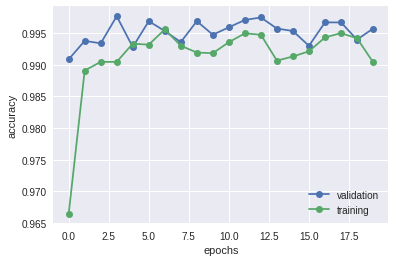

In [0]:
plt.plot(history.epoch,history.history['val_acc'],'-o',label='validation')
plt.plot(history.epoch,history.history['acc'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)

In [0]:
loss_and_metrics = model.evaluate(x_train1, y_train1)
print(loss_and_metrics)


30596/30596 [==============================] - 3s 93us/step
[0.019011949433387104, 0.9961106026931625]


## 10. Make only the dense layers to be trainable and convolutional layers to be non-trainable

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv_1
False
conv_2
False
max_1
False
drop_1
False
flatten_1
False
dense_1
True
dense_2
True
drop_2
False
dense_3
True


In [0]:
model.save_weights("/content/drive/My Drive/AIML/Datasets/cnn_mnist_weights.h5")

## 11. Use the model trained on 0 to 4 digit classification and train it on the dataset which has digits 5 to 9  (Using Transfer learning keeping only the dense layers to be trainable)

In [0]:

x_train2 = x_train2.reshape(x_train2.shape[0], 28, 28, 1)   ## grey scale image and hence adding 1
x_test2 = x_test2.reshape(x_test2.shape[0], 28, 28, 1)

In [0]:
x_train2 /= 255
x_test2 /= 255

In [0]:
np.unique(y_train2)

array([5, 6, 7, 8, 9], dtype=uint8)

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y_train2 = encoder.fit_transform(y_train2)
y_test2 = encoder.fit_transform(y_test2)

In [0]:
y_train2

array([0, 4, 0, ..., 0, 1, 3])

In [0]:
y_train2 = tf.keras.utils.to_categorical(y_train2, num_classes=5)
y_test2 = tf.keras.utils.to_categorical(y_test2, num_classes=5)

In [0]:
#The pre-trained weights must exist in a folder called "data" in the current folder
model.load_weights('/content/drive/My Drive/AIML/Datasets/cnn_mnist_weights.h5')

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
#Training on the dataset
hist = model.fit(x_train2, y_train2,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test2, y_test2))

Train on 29404 samples, validate on 4861 samples
Epoch 1/20
29404/29404 [==============================] - 7s 247us/step - loss: 2.5591 - acc: 0.4918 - val_loss: 0.8593 - val_acc: 0.7898
Epoch 2/20
29404/29404 [==============================] - 7s 231us/step - loss: 0.8937 - acc: 0.7434 - val_loss: 0.4561 - val_acc: 0.9039
Epoch 3/20
29404/29404 [==============================] - 7s 236us/step - loss: 0.5538 - acc: 0.8471 - val_loss: 0.2908 - val_acc: 0.9405
Epoch 4/20
29404/29404 [==============================] - 7s 235us/step - loss: 0.3994 - acc: 0.8927 - val_loss: 0.2071 - val_acc: 0.9570
Epoch 5/20
29404/29404 [==============================] - 7s 231us/step - loss: 0.3058 - acc: 0.9177 - val_loss: 0.1560 - val_acc: 0.9640
Epoch 6/20
29404/29404 [==============================] - 7s 229us/step - loss: 0.2309 - acc: 0.9350 - val_loss: 0.1135 - val_acc: 0.9656
Epoch 7/20
29404/29404 [==============================] - 7s 235us/step - loss: 0.1854 - acc: 0.9478 - val_loss: 0.0941 - v

## 12. Print the accuracy for classification of digits 5 to 9

In [0]:
loss_and_metrics = model.evaluate(x_train1, y_train1)
print(loss_and_metrics)

30596/30596 [==============================] - 3s 89us/step
[6.321098393716911, 0.334030592234279]


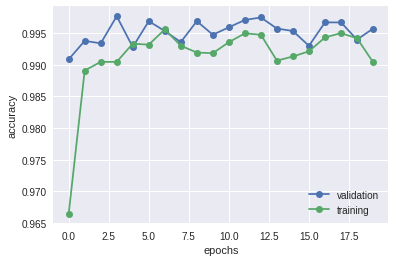

In [0]:
plt.plot(hist.epoch,history.history['val_acc'],'-o',label='validation')
plt.plot(hist.epoch,history.history['acc'],'-o',label='training')

plt.legend(loc=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)

## Sentiment analysis <br> 

The objective of the second problem is to perform Sentiment analysis from the tweets data collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

### 13. Read the dataset (tweets.csv) and drop the NA's while reading the dataset

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [0]:
ds = pd.read_csv('/content/drive/My Drive/AI_ML/Residency 8 lab/Questions/tweets.csv',encoding='ISO-8859-1')

In [3]:
ds.shape

(9093, 3)

In [4]:
ds.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [0]:
ds.dropna(inplace=True)

In [6]:
ds.shape

(3291, 3)

### 14. Preprocess the text and add the preprocessed text in a column with name `text` in the dataframe.

In [0]:
def preprocess(text):
    try:
        return text.decode('ascii')
    except Exception as e:
        return ""

In [0]:
ds['text'] = [preprocess(text) for text in ds.tweet_text]

In [9]:
ds.shape

(3291, 4)

In [10]:
ds.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


### 15. Consider only rows having Positive emotion and Negative emotion and remove other rows from the dataframe.

In [11]:
ds['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [0]:
# create a new DataFrame that only contains the Positive and Negative emotion
ds_best_worst = ds[(ds.is_there_an_emotion_directed_at_a_brand_or_product=='Positive emotion') | (ds.is_there_an_emotion_directed_at_a_brand_or_product=='Negative emotion')]

In [13]:
ds_best_worst.shape

(3191, 4)

In [14]:
ds_best_worst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3191 entries, 0 to 9088
Data columns (total 4 columns):
tweet_text                                            3191 non-null object
emotion_in_tweet_is_directed_at                       3191 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    3191 non-null object
text                                                  3191 non-null object
dtypes: object(4)
memory usage: 124.6+ KB


### 16. Represent text as numerical data using `CountVectorizer` and get the document term frequency matrix

#### Use `vect` as the variable name for initialising CountVectorizer.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [0]:
# use CountVectorizer 
vect = CountVectorizer()


In [17]:
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [18]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(ds_best_worst['text']).toarray(), columns=vect.get_feature_names())
tf

,000,02,03,08,10,100,100s,100tc,101,10am,...,zimride,zing,zip,zite,zms,zombies,zomg,zone,zoom,zzzs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3191 entries, 0 to 3190
Columns: 5482 entries, 000 to zzzs
dtypes: int64(5482)
memory usage: 133.5 MB


In [20]:
# Document Frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(ds_best_worst['text']).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 5482), columns=vect.get_feature_names())

,000,02,03,08,10,100,100s,100tc,101,10am,...,zimride,zing,zip,zite,zms,zombies,zomg,zone,zoom,zzzs
0,6,1,2,1,15,5,1,1,3,1,...,1,1,1,1,2,2,4,1,2,1


In [21]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df

,000,02,03,08,10,100,100s,100tc,101,10am,...,zimride,zing,zip,zite,zms,zombies,zomg,zone,zoom,zzzs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [22]:
# TfidfVectorizer
vect1 = TfidfVectorizer()
pd.DataFrame(vect1.fit_transform(ds_best_worst['text']).toarray(), columns=vect.get_feature_names())

,000,02,03,08,10,100,100s,100tc,101,10am,...,zimride,zing,zip,zite,zms,zombies,zomg,zone,zoom,zzzs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### 17. Find number of different words in vocabulary

In [23]:
tf.columns

Index([u'000', u'02', u'03', u'08', u'10', u'100', u'100s', u'100tc', u'101',
       u'10am',
       ...
       u'zimride', u'zing', u'zip', u'zite', u'zms', u'zombies', u'zomg',
       u'zone', u'zoom', u'zzzs'],
      dtype='object', length=5482)

#### Tip: To see all available functions for an Object use dir

In [24]:
dir(tf)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 u'______',
 u'_______',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '

### 18. Find out how many Positive and Negative emotions are there.

Hint: Use value_counts on that column

In [25]:
ds_best_worst['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

### 19. Change the labels for Positive and Negative emotions as 1 and 0 respectively and store in a different column in the same dataframe named 'Label'

Hint: use map on that column and give labels

In [0]:
ds_best_worst['Label'] = (ds_best_worst['is_there_an_emotion_directed_at_a_brand_or_product'] == "Positive emotion").astype(int)

In [27]:
ds_best_worst

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text,Label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,"#SXSW is just starting, #CTIA is around the co...",1
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,Beautifully smart and simple idea RT @madebyma...,1
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,Counting down the days to #sxsw plus strong Ca...,1
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,Excited to meet the @samsungmobileus at #sxsw ...,1
11,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion,Find &amp; Start Impromptu Parties at #SXSW Wi...,1


### 20. Define the feature set (independent variable or X) to be `text` column and `labels` as target (or dependent variable)  and divide into train and test datasets

In [0]:

from sklearn.model_selection import train_test_split
X = ds_best_worst.loc[:, 'text'].values
Y = ds_best_worst.loc[:, 'Label'].values

In [0]:
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [30]:
X_train.shape

(2393,)

In [31]:
y_train.shape

(2393,)

In [32]:
X_test.shape

(798,)

In [33]:
y_test.shape

(798,)

## 21. **Predicting the sentiment:**


### Use Naive Bayes and Logistic Regression and their accuracy scores for predicting the sentiment of the given text

In [0]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect1.fit_transform(X_train)

In [35]:
X_train_dtm

<2393x4765 sparse matrix of type '<type 'numpy.float64'>'
	with 38199 stored elements in Compressed Sparse Row format>

In [36]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect1.transform(X_test)
X_test_dtm

<798x4765 sparse matrix of type '<type 'numpy.float64'>'
	with 11604 stored elements in Compressed Sparse Row format>

In [0]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [38]:
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [40]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8208020050125313

In [41]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[  2, 143],
       [  0, 653]])

In [42]:
# print message text for the false positives (ham incorrectly classified as spam)
X_test[y_test < y_pred_class]

array(['',
       u"RT @mention Josh Clark:  I hate the iPad's back button with the heat of a million suns.  #tapworthy #SXSW",
       u"My iPhone battery can't keep up with my tweets! Thanks Apple.  #SXSW  #precommerce",
       u"Just when you thought &quot;social&quot; couldn't get more overblown at #sxsw, Google may be announcing &quot;Circles&quot; today: {link}",
       u'My friends iphone changed BACK an hour instead of forward. Its AT&amp;T. Any hints on how to fix it?! #SXSW #iphone #help',
       u'Dense una vuelta por #socialfuel #sxsw para ver la gran diferencia..RT @mention &quot;The revolution will be clumsily translated by Google.&quot;',
       u'Twitter you have failed me for the last time *force chokes iPhone* #sxsw',
       u'Excited to meet the @mention at #sxsw so I can show them my Sprint Galaxy S still running Android 2.1.   #fail',
       u"Day 1 and my charger kicked the bucket. Where the heck is the Apple store that's within walking distance? #sxsw",
       u'W

In [0]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [44]:
# train the model using X_train_dtm
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [46]:
# calculate predicted probabilities for X_test_dtm
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.84092539, 0.81315686, 0.81289452, 0.94360262, 0.69908593,
       0.87647693, 0.75331301, 0.91030717, 0.81315686, 0.89928846,
       0.60677955, 0.73451923, 0.90131208, 0.87466684, 0.81315686,
       0.69988203, 0.70493975, 0.9498237 , 0.8751003 , 0.8891973 ,
       0.7779613 , 0.71140847, 0.85596225, 0.93579381, 0.6166812 ,
       0.81400925, 0.85301058, 0.92836022, 0.78257961, 0.49967483,
       0.81315686, 0.95635827, 0.60863842, 0.69177481, 0.89761641,
       0.78996971, 0.96763125, 0.83570259, 0.92876773, 0.94159629,
       0.88523254, 0.66403638, 0.64461941, 0.75854905, 0.86310433,
       0.71165666, 0.60425412, 0.81038907, 0.63408822, 0.89356692,
       0.83495705, 0.79866996, 0.9539977 , 0.53254018, 0.72149233,
       0.9286802 , 0.88847511, 0.91044525, 0.81869838, 0.79692006,
       0.94641725, 0.6816489 , 0.92890329, 0.86044452, 0.85290137,
       0.82765942, 0.8017691 , 0.71252942, 0.9402471 , 0.95592287,
       0.86928947, 0.85694121, 0.83219647, 0.95780206, 0.92489

In [47]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.8283208020050126

In [48]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.8312826741300101

## 22. Create a function called `tokenize_predict` which can take count vectorizer object as input and prints the accuracy for x (text) and y (labels)

In [0]:
from sklearn.model_selection import train_test_split
X = ds_best_worst.loc[:, 'text'].values
Y = ds_best_worst.loc[:, 'Label'].values
def tokenize_test(vect):
   X_train_dtm = vect.fit_transform(X_train)
   print('Features: ', X_train_dtm.shape[1])
   X_test_dtm = vect.transform(X_test)
   nb = MultinomialNB()
   nb.fit(X_train_dtm, y_train)
   y_pred_class = nb.predict(X_test_dtm)
   print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [52]:
tokenize_test(vect)

('Features: ', 4765)
('Accuracy: ', 0.8395989974937343)


### Create a count vectorizer function which includes n_grams = 1,2  and pass it to tokenize_predict function to print the accuracy score

In [53]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

('Features: ', 24066)
('Accuracy: ', 0.8508771929824561)


### Create a count vectorizer function with stopwords = 'english'  and pass it to tokenize_predict function to print the accuracy score

In [54]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

('Features: ', 100)
('Accuracy: ', 0.8032581453634086)


### Create a count vectorizer function with stopwords = 'english' and max_features =300  and pass it to tokenize_predict function to print the accuracy score

In [55]:
# remove English stop words and only keep 300 features
vect = CountVectorizer(stop_words='english', max_features=300)
tokenize_test(vect)

('Features: ', 300)
('Accuracy: ', 0.8208020050125313)


### Create a count vectorizer function with n_grams = 1,2  and max_features = 15000  and pass it to tokenize_predict function to print the accuracy score

In [57]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english', max_features=15000)
tokenize_test(vect)

('Features: ', 15000)
('Accuracy: ', 0.8508771929824561)


### Create a count vectorizer function with n_grams = 1,2  and include terms that appear at least 2 times (min_df = 2)  and pass it to tokenize_predict function to print the accuracy score

In [58]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english',min_df = 2, max_features=15000)
tokenize_test(vect)

('Features: ', 5231)
('Accuracy: ', 0.8596491228070176)
